In [141]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [142]:
#Preprocessing phase
data = pd.read_csv('titanic-passengers.csv',sep=";")

In [143]:
data.shape

(891, 12)

In [144]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [145]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [146]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [147]:
#finding_the_missing_value
import pandas as pd
df = pd.DataFrame(data)
df.isnull()
#returns True if a field has missing values and false if the field does not have missing values.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


In [148]:
#Number of the missing values on each column
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [149]:
#Number of missing values in the DataFrame
df.isnull().sum().sum()

866

In [150]:
#We remove the unnecessary features for our study
data.drop(['PassengerId','Cabin',"Embarked"],axis=1,inplace=True)
data=data.fillna(data[["Age"]].mean())
data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
dtype: int64

In [151]:
#Conversion of the values ​​of the column that will be used as output y (Survived)
encoder=LabelEncoder()
data['Survived']=encoder.fit_transform(data["Survived"])
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000


In [152]:
#Verify if the data is ready to be treated
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000


In [153]:
#Visualization phase
import os 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

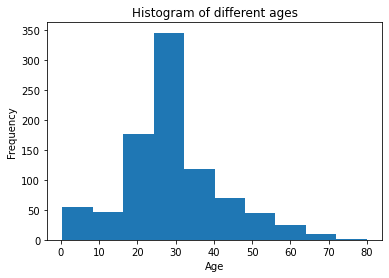

In [154]:
#Distribution
#Variable distribution describes in a graphical format how often the values of the variable occurs in the dataset.
# histograms, barplots, and boxplots.
plt.title("Histogram of different ages")
plt.xlabel("Age")
data["Age"].plot.hist()

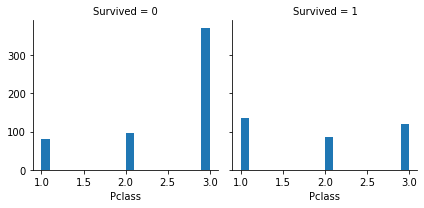

In [155]:
#Visualize the correlation between Pclass and Survived 
g=sns.FacetGrid(data,col="Survived")
g.map(plt.hist,'Pclass',bins=20)

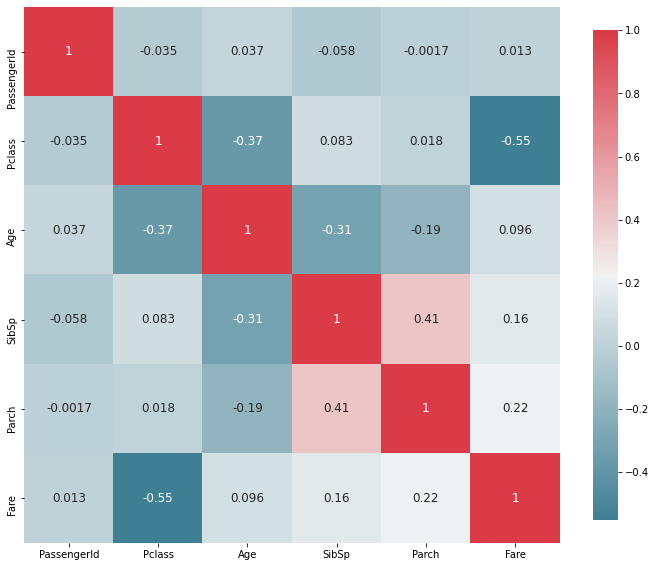

In [156]:
#Paragraph:
#This function will create the correlations between the features that we have in our dataset.
#it will therefore make us visualize through s = sns.heatmap () the relationship between the different features of our dataset.
#for example 'Parch' and 'SibPc' have a very close correlation because they are equal to 1.
#in other words, the more the correlation results are equal to one, the more the variables are correlated and linked.
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(df)

In [157]:
#Use the groupby function combined with the mean() to view the relation between Pclass and survived 
data[['Pclass', 'Survived']].groupby(['Survived'], as_index = False)['Pclass'].mean()

,Survived,Pclass
0,0,2.531876
1,1,1.950292


In [158]:
#as a final step try to drop the useless columns such as Ticket
data.drop(["Ticket"],axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000


In [159]:
l = [name[name.find(',')+2: name.find('.')] for name in data['Name']]
data2=data
data2['title']=pd.DataFrame(l)
data2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,title
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,Mr
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,Mr
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,Mr
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,Mrs
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,Mr


In [160]:
#Visualize the correlation between Title and other features(e.g Sex, Fare, Age...)
data2.info()
data2["title"].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   title     891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


array(['Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mrs',
       'Mr', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Dr', 'Mr', 'Miss',
       'Mr', 'Mr', 'Mr', 'Major', 'Mrs', 'Don', 'Mr', 'Mr', 'Mr', 'Miss',
       'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Master', 'Dr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Mrs', 'Mrs', 'Miss', 'Miss', 'Master', 'Miss', 'Mr', 'Rev', 'Mr',
       'Mrs', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr',
       'Miss', 'Miss', 'Miss', 'Mrs', 'Master', 'Mr', 'Mr', 'Mr', 'Mr',
       'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr',
       'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Mr',
       'Mrs', 'Miss', 'Mr', 'Mr', 'Master', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Col', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr'

In [162]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [163]:
data['Statut'] = data['title'].map(Title_Dictionary,data["title"]) 
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,title,Statut
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,13.0000,Mr,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,7.6500,Mr,Mrs
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,7.8542,Mr,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,21.0750,Mrs,Mrs
4,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,52.0000,Mr,Mrs


In [164]:
#Yes FamilySize is useful because it represents the correlation between the two 
#features Parch and Size which gives us a lot of information about our dataset.
data["FamilySize"]=data['Parch'] +data['SibSp']
data.drop(["SibSp","Parch"],axis=1,inplace=True)
data.head()

,Survived,Pclass,Name,Sex,Age,Fare,title,Statut,FamilySize
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,13.0000,Mr,Mrs,0
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,7.6500,Mr,Mrs,0
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,7.8542,Mr,Mrs,0
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,21.0750,Mrs,Mrs,4
4,0,1,"Davidson, Mr. Thornton",male,31.0,52.0000,Mr,Mrs,1


In [171]:
#finding_the_missing_value
import pandas as pd
df = pd.DataFrame(data)
df.isnull()

,Survived,Pclass,Name,Sex,Age,Fare,title,Statut,FamilySize
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False


Machine Learning

In [190]:
x = data[['Pclass','Age', 'Fare','FamilySize']]
y= data['Survived']

In [191]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [192]:
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred  = model.predict(x_test)
print("Accuracy={:.2f}".format(model.score(x_test, y_test)))

Accuracy=0.72


In [193]:
y_pred  = model.predict(x_test)

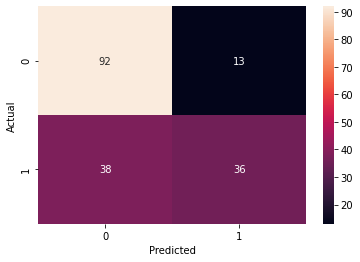

In [194]:
#Use a confusion matrix to validate your model. 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

ROC/AUC


In [195]:
#An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.
#This curve plots two parameters: TPR & FPR
#An ROC curve plots TPR vs. FPR at different classification thresholds. 
#Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.

In [196]:
#AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).
#AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random 
#positive example more highly than a random negative example

In [197]:
TP = 95 #95 positive class data points were correctly classified by the model
TN = 51 #51 negative class data points were correctly classified by the model
FP = 10 #10 negative class data points were incorrectly classified as belonging to the positive class by the model
FN = 23 #23 positive class data points were incorrectly classified as belonging to the negative class by the model

In [198]:
accurency=(TP+TN)/(TP+TN+FP+FN)
accurency

0.8156424581005587

In [199]:
precision=TP/(TP+FP)
precision

0.9047619047619048

In [200]:
recall=TP/(TP+FN)
recall

0.8050847457627118

In [201]:
auc_score = roc_auc_score(y_test, y_pred)
print(auc_score)

0.6813384813384813
